In [1]:
import pandas as pd
df = pd.read_csv('ViewingActivity.csv')

In [2]:
df = df.drop(['Attributes', 'Supplemental Video Type', 'Device Type', 'Bookmark', 'Latest Bookmark', 'Country'], axis=1)
df.head(1)

,Profile Name,Start Time,Duration,Title
0,kamila bish boss,2023-03-06 17:59:13,00:00:06,Season 1 Plot Clip: Crash Course in Romance


In [3]:
df['Start Time'] = pd.to_datetime(df['Start Time'])
df.dtypes

Profile Name            object
Start Time      datetime64[ns]
Duration                object
Title                   object
dtype: object

In [4]:
df['Duration'] = pd.to_timedelta(df['Duration'])


In [14]:
account_df = df[df['Profile Name'] == 'nesrin the imposter']

In [15]:
# Filter out rows where the duration is less than 3 minutes
account_df = account_df[account_df['Duration'] > pd.to_timedelta('3 minutes')]

In [16]:
account_df['Title'] = account_df["Title"].str.split(':').str[0]

In [17]:
# Group the DataFrame by the title and sum the duration
show_durations = account_df.groupby('Title')['Duration'].sum()

# Convert the durations to hours
show_durations_hours = show_durations / pd.Timedelta(hours=1)

In [22]:
show_durations.sum()

Timedelta('9 days 18:34:40')

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

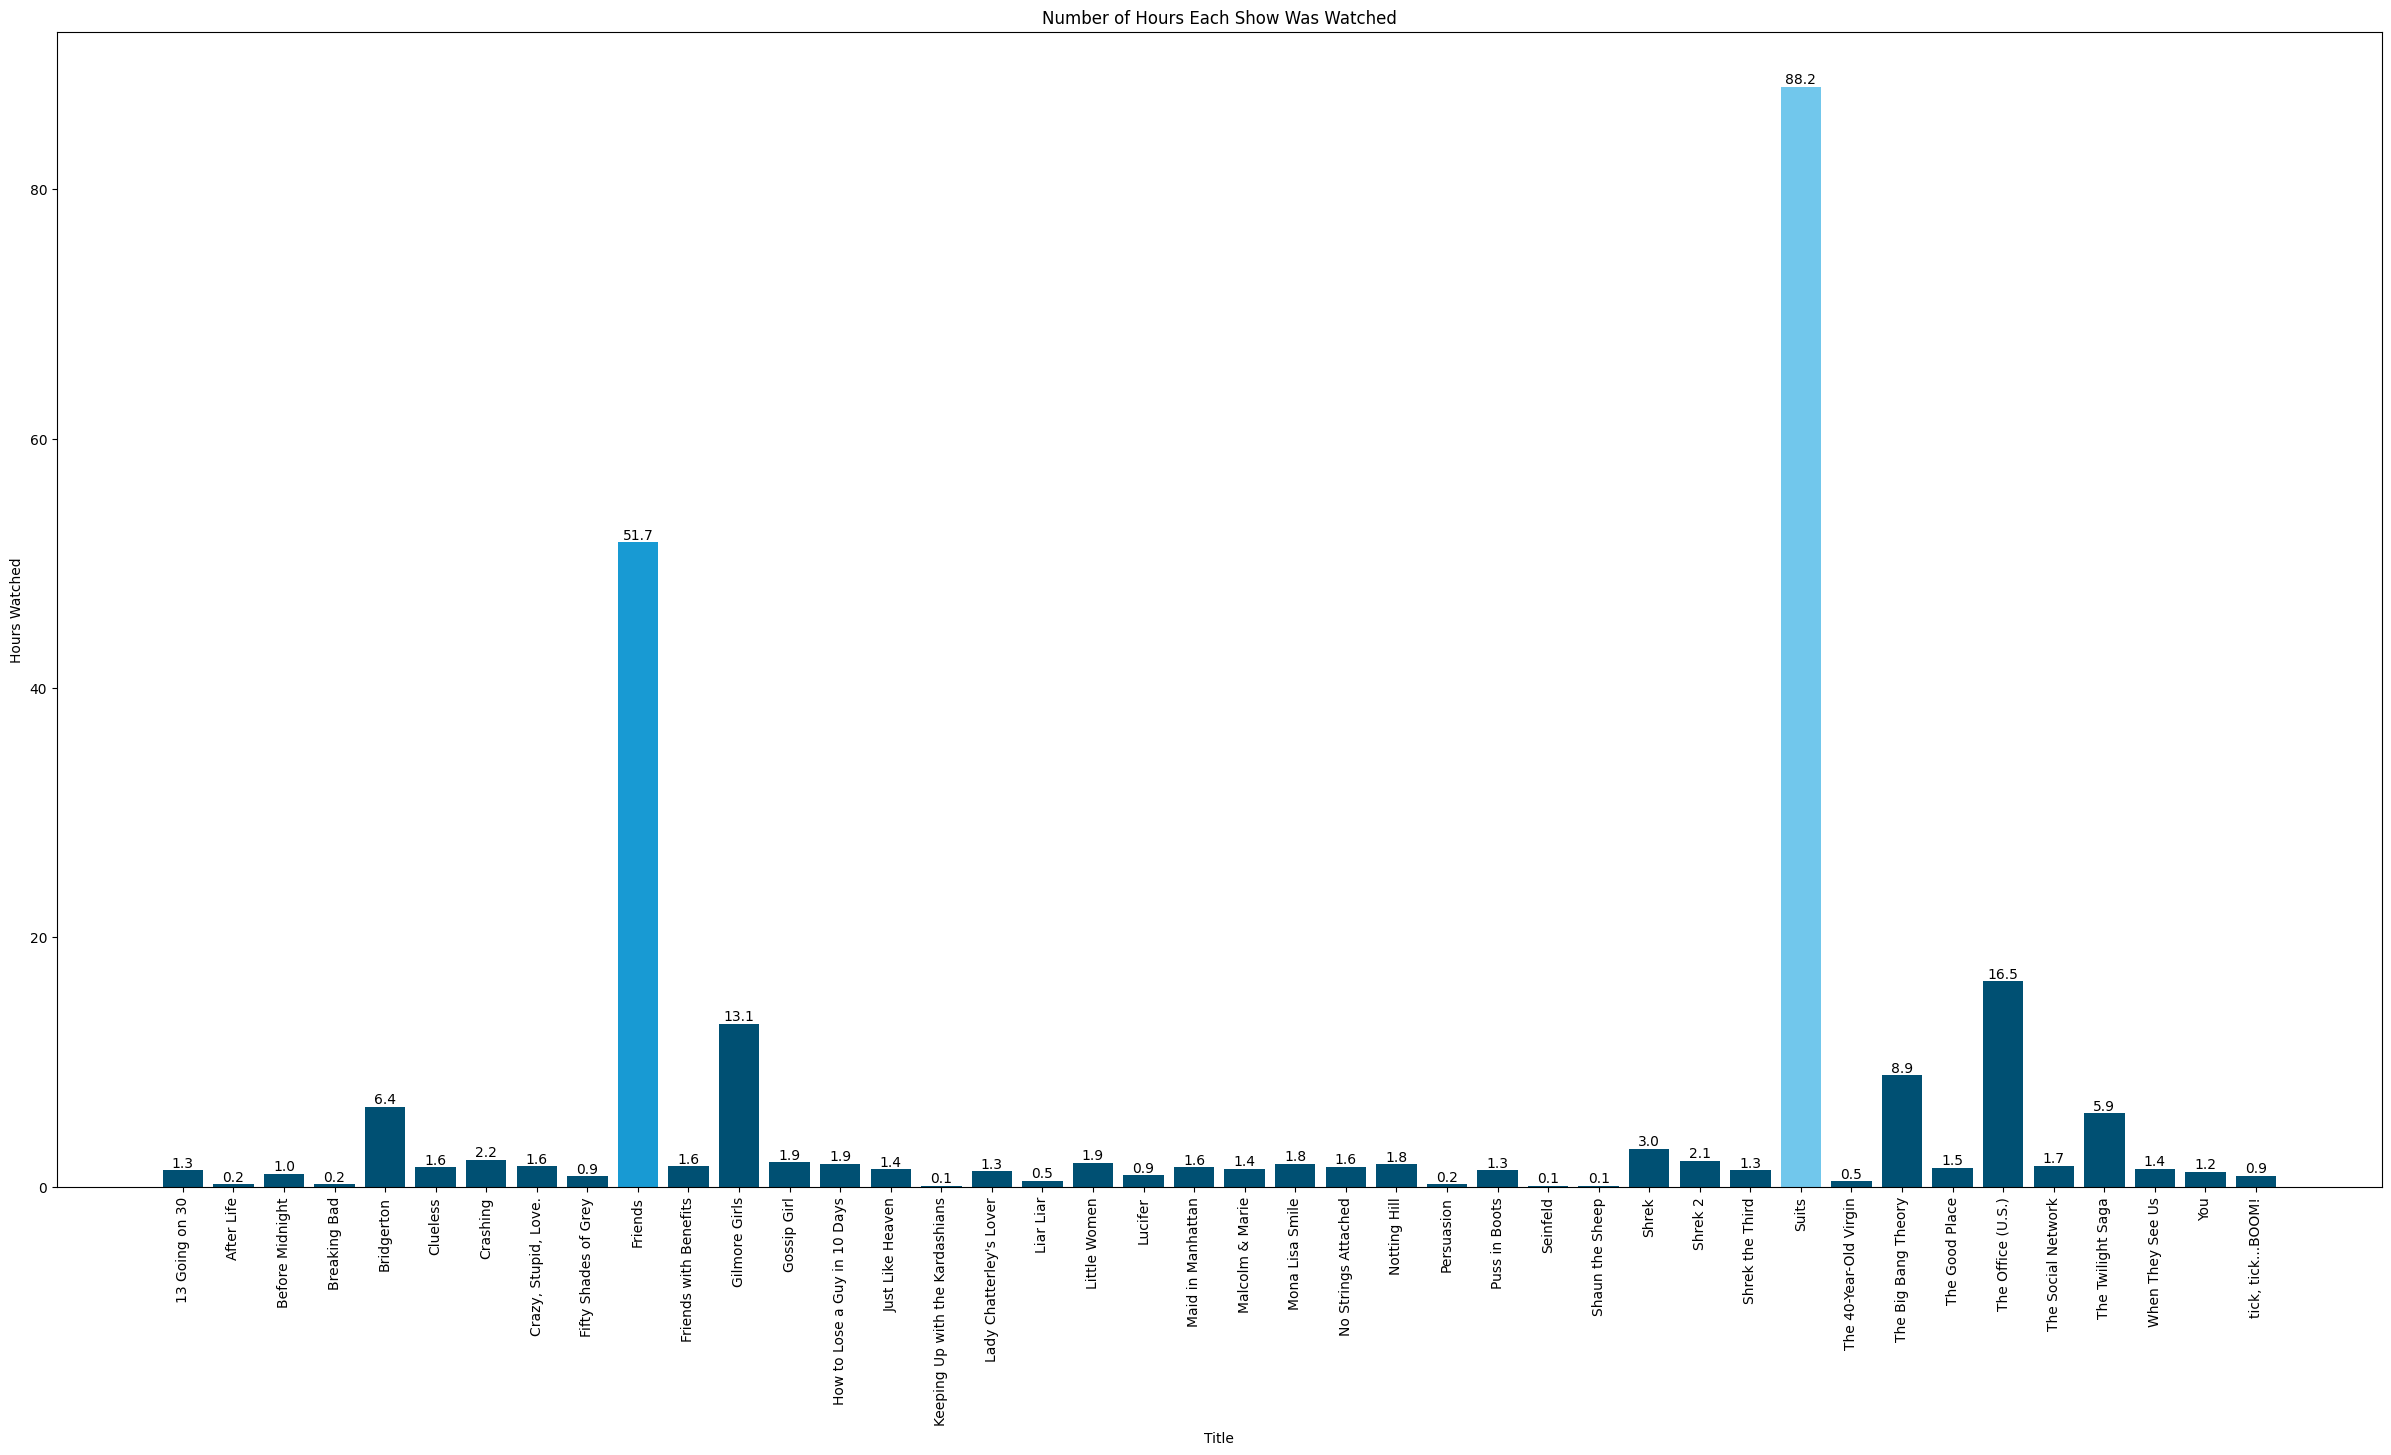

In [19]:
# Create a colormap for the bars
colors = ['#005073', '#107dac', '#189ad3','#1ebbd7','#71c7ec']
cmap = mcolors.LinearSegmentedColormap.from_list('my_cmap', colors, N=len(colors))

# Set up the plot
fig, ax = plt.subplots(figsize=(30,15))

# Create the bars with the appropriate colors
bars = ax.bar(show_durations_hours.index, show_durations_hours, color=cmap((show_durations_hours.values - show_durations_hours.values.min()) / (show_durations_hours.values.max() - show_durations_hours.values.min())))

# Add the hours on top of each bar
for bar, duration in zip(bars, show_durations_hours):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.25, f'{duration:.1f}', ha='center', fontsize=10)

# Set the title and axis labels
ax.set_xlabel('Title')
ax.set_ylabel('Hours Watched')
ax.set_title('Number of Hours Each Show Was Watched')
plt.xticks(rotation=90)
# Show the plot
plt.show()